# 2. 구 별 이동인구 분석
### 서울시 생활이동 정보를 기반으로 서울시 자치구 별 이동인구를 분석합니다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 안내

[데이터 파일명]
* 2. seoul_moving.csv

[데이터 정보]
* 서울 시 구별 이동 2022년 4월 데이터

[데이터 컬럼 정보]
* 도착시간 : 0 -> "0:00~0:59"를 의미
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만(0~3)의 경우 * 처리

# 2.1.데이터 불러오기

#### [2.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '2. seoul_moving.csv'파일을 'seoul_moving' 변수에 저장하세요.

In [ ]:
import pandas as pd

In [ ]:
seoul_moving = pd.read_csv('/content/drive/MyDrive/미니프로젝트/1차_서울시 생활정보 기반 대중교통 수요 분석/데이터/2. seoul_moving.csv')

In [ ]:
seoul_moving.shape

(28923054, 11)

#### [2.2.1] 기본 정보 확인하기


In [ ]:
seoul_moving.head()

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [ ]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   대상연월         int64 
 2   요일           object
 3   도착시간         int64 
 4   출발 시군구 코드    int64 
 5   도착 시군구 코드    int64 
 6   성별           object
 7   나이           int64 
 8   이동유형         object
 9   평균 이동 시간(분)  int64 
 10  이동인구(합)      object
dtypes: int64(7), object(4)
memory usage: 2.4+ GB


* [참고]
    * " 2022년 4월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [2.2.2] 결측치 처리 (NaN이 아닌 결측치 처리)

* '이동인구(합)' column은 이동 인구의 합산인데 숫자가 아닌 object 타입

    - (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만 즉, 값이 0~3일 경우 별표 * 처리)

In [ ]:
seoul_moving['이동인구(합)'].value_counts()

*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [ ]:
# 별표(*)로 표현된 값을 대체합니다.
#최빈값, 평균값도 알 수 없으므로 0~3의 중위값인 1.5로 대체)
seoul_moving['이동인구(합)'].replace('*', 1.5, inplace=True)
seoul_moving['이동인구(합)'].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [ ]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   대상연월         int64 
 2   요일           object
 3   도착시간         int64 
 4   출발 시군구 코드    int64 
 5   도착 시군구 코드    int64 
 6   성별           object
 7   나이           int64 
 8   이동유형         object
 9   평균 이동 시간(분)  int64 
 10  이동인구(합)      object
dtypes: int64(7), object(4)
memory usage: 2.4+ GB


#### [2.2.3] 이동유형, 요일, 성별 변수의 value수 파악


In [ ]:
# 이동인구(합) column의 데이터 타입 변경
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype('float')
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   대상연월         int64  
 2   요일           object 
 3   도착시간         int64  
 4   출발 시군구 코드    int64  
 5   도착 시군구 코드    int64  
 6   성별           object 
 7   나이           int64  
 8   이동유형         object 
 9   평균 이동 시간(분)  int64  
 10  이동인구(합)      float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.4+ GB


In [ ]:
# 요일 컬럼의 요일 별 합계.
#2022년 4월의 요일 수 - 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

In [ ]:
# 성별 컬럼의 각 성별 합계
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

In [ ]:
# 이동유형 컬럼의 값 별 합계
# H(야간상주지), W(주간상주지), E(기타)
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

#### [2.2.4] 심야 이동이 가장 많은 요일 확인

In [ ]:
#심야 이동이 가장 많은 요일 확인
# 심야시간은 0:00~ 4:59
condition = (seoul_moving['도착시간'] >= 0) & (seoul_moving['도착시간'] < 5)
seoul_moving.loc[condition, '요일'].value_counts()

토    423995
금    359012
일    331392
목    308651
수    303357
화    292786
월    273062
Name: 요일, dtype: int64

#### [2.2.5] 서울 지역의 데이터만 추출


* 서울시의 데이터만 필요하므로 출발과 도착이 모두 서울인 데이터만 추출.
* 아래 사이트에서 서울시 데이터만 추출하기 위해 필요한 정보를 탐색 (자치구 코드 정보)
https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

In [ ]:
# 출발 시군구 코드, 도착 시군구 코드 활용하여 출발과 도착이 모두 서울인 데이터만 추출해보세요.
in_seoul = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] >= 11000) & (seoul_moving['출발 시군구 코드'] <= 11250)]
in_seoul = in_seoul.loc[(seoul_moving['도착 시군구 코드'] >= 11000) & (seoul_moving['도착 시군구 코드'] <= 11250)]
in_seoul

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...,...
28875001,920410,202204,토,23,11250,11250,M,80,WH,10,85.10
28875002,920411,202204,토,23,11250,11250,M,80,EH,10,28.36
28875003,920412,202204,토,23,11250,11250,M,80,EE,20,37.99
28875004,920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [2.2.6] 서울지역의 구 별로 groupby하여 데이터를 확인 (유동인구 기준)


* 유출이 제일 많은 구

* 유입이 제일 많은 구

* 유출이 제일 적은 구

* 유입이 제일 적은 구

* [참고] 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [ ]:
outflow = in_seoul.groupby('출발 시군구 코드', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=False)
outflow

,출발 시군구 코드,이동인구(합)
22,11230,46220924.63
23,11240,36207933.02
21,11220,29698071.20
18,11190,25835980.43
13,11140,24517465.86
15,11160,22526485.94
24,11250,22035184.61
10,11110,21392595.19
1,11020,20296645.78
0,11010,19862431.70


In [ ]:
inflow = in_seoul.groupby('도착 시군구 코드', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=False)
inflow

,도착 시군구 코드,이동인구(합)
22,11230,46152613.40
23,11240,36156898.50
21,11220,29763430.80
18,11190,25824111.41
13,11140,24539297.75
15,11160,22770901.22
24,11250,21996357.39
10,11110,21371821.86
1,11020,20275545.43
0,11010,19809988.63


#### [2.2.7] 낮시간만 분석 대상에 넣기 위해 심야버스 제외

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [ ]:
# 아래에 코드를 작성하고 결과를 확인합니다.
in_seoul = in_seoul[~in_seoul['도착시간'].between(0, 4)]
in_seoul['도착시간'].value_counts()

17    636891
18    630673
16    621016
15    605241
14    597336
19    594995
13    593057
12    567568
11    532959
20    530641
10    505215
21    482814
9     479947
8     444443
22    434670
7     376729
23    366211
6     316162
5     239370
Name: 도착시간, dtype: int64

#### [2.2.8] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균과 합 도출


In [ ]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 평균을 도출하여
# seoul_moving_mean에 저장
seoul_moving_mean = in_seoul.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_moving_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [ ]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 합을 도출하여
# seoul_moving_sum에 저장
seoul_moving_sum = in_seoul.groupby('도착 시군구 코드', as_index=False)[
    ['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_moving_sum

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [ ]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경
seoul_moving_mean.rename(columns={'평균 이동 시간(분)':'구별 이동 시간 평균',
                                  '이동인구(합)':'구별 이동 인구 평균'}, inplace=True)
seoul_moving_sum.rename(columns={'평균 이동 시간(분)':'구별 이동 시간 합',
                                  '이동인구(합)':'구별 이동 인구 합'}, inplace=True)
print(seoul_moving_mean.columns)
print(seoul_moving_sum.columns)

Index(['도착 시군구 코드', '구별 이동 시간 평균', '구별 이동 인구 평균'], dtype='object')
Index(['도착 시군구 코드', '구별 이동 시간 합', '구별 이동 인구 합'], dtype='object')


In [ ]:
# seoul_moving_mean, seoul_moving_sum을 merge
df_seoul_moving = pd.merge(seoul_moving_mean, seoul_moving_sum)
df_seoul_moving

,도착 시군구 코드,구별 이동 시간 평균,구별 이동 인구 평균,구별 이동 시간 합,구별 이동 인구 합
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99
5,11060,21.673451,39.942708,8838130,16288077.28
6,11070,23.412789,41.012753,7939300,13907465.59
7,11080,22.160283,45.816273,9072420,18757182.35
8,11090,23.811274,39.128470,7649610,12570412.30
9,11100,24.489976,37.882283,6995880,10821566.75


In [ ]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장
df_seoul_moving.to_csv('/content/drive/MyDrive/미니프로젝트/1차_서울시 생활정보 기반 대중교통 수요 분석/데이터/df_seoul_moving.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_bar_graphs(dataframe, index_column=None, num_cols=2, figsize=(20, 15), gap=0.5):
    if index_column:
        dataframe = dataframe.set_index(index_column)

    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(numeric_columns)
    num_rows = int(np.ceil(num_plots / num_cols))

    # Create subplots using constrained_layout
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()

    # Loop through numeric columns and create bar graphs
    for i, col in enumerate(numeric_columns):
        ax = axes[i]
        dataframe[col].plot(kind='bar', ax=ax)
        ax.set_title(col)
        ax.set_xlabel(index_column if index_column else "Index")
        ax.set_ylabel("Value")
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels for better readability

    # Hide any unused subplots
    for i in range(num_plots, num_rows * num_cols):
        axes[i].axis('off')

    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

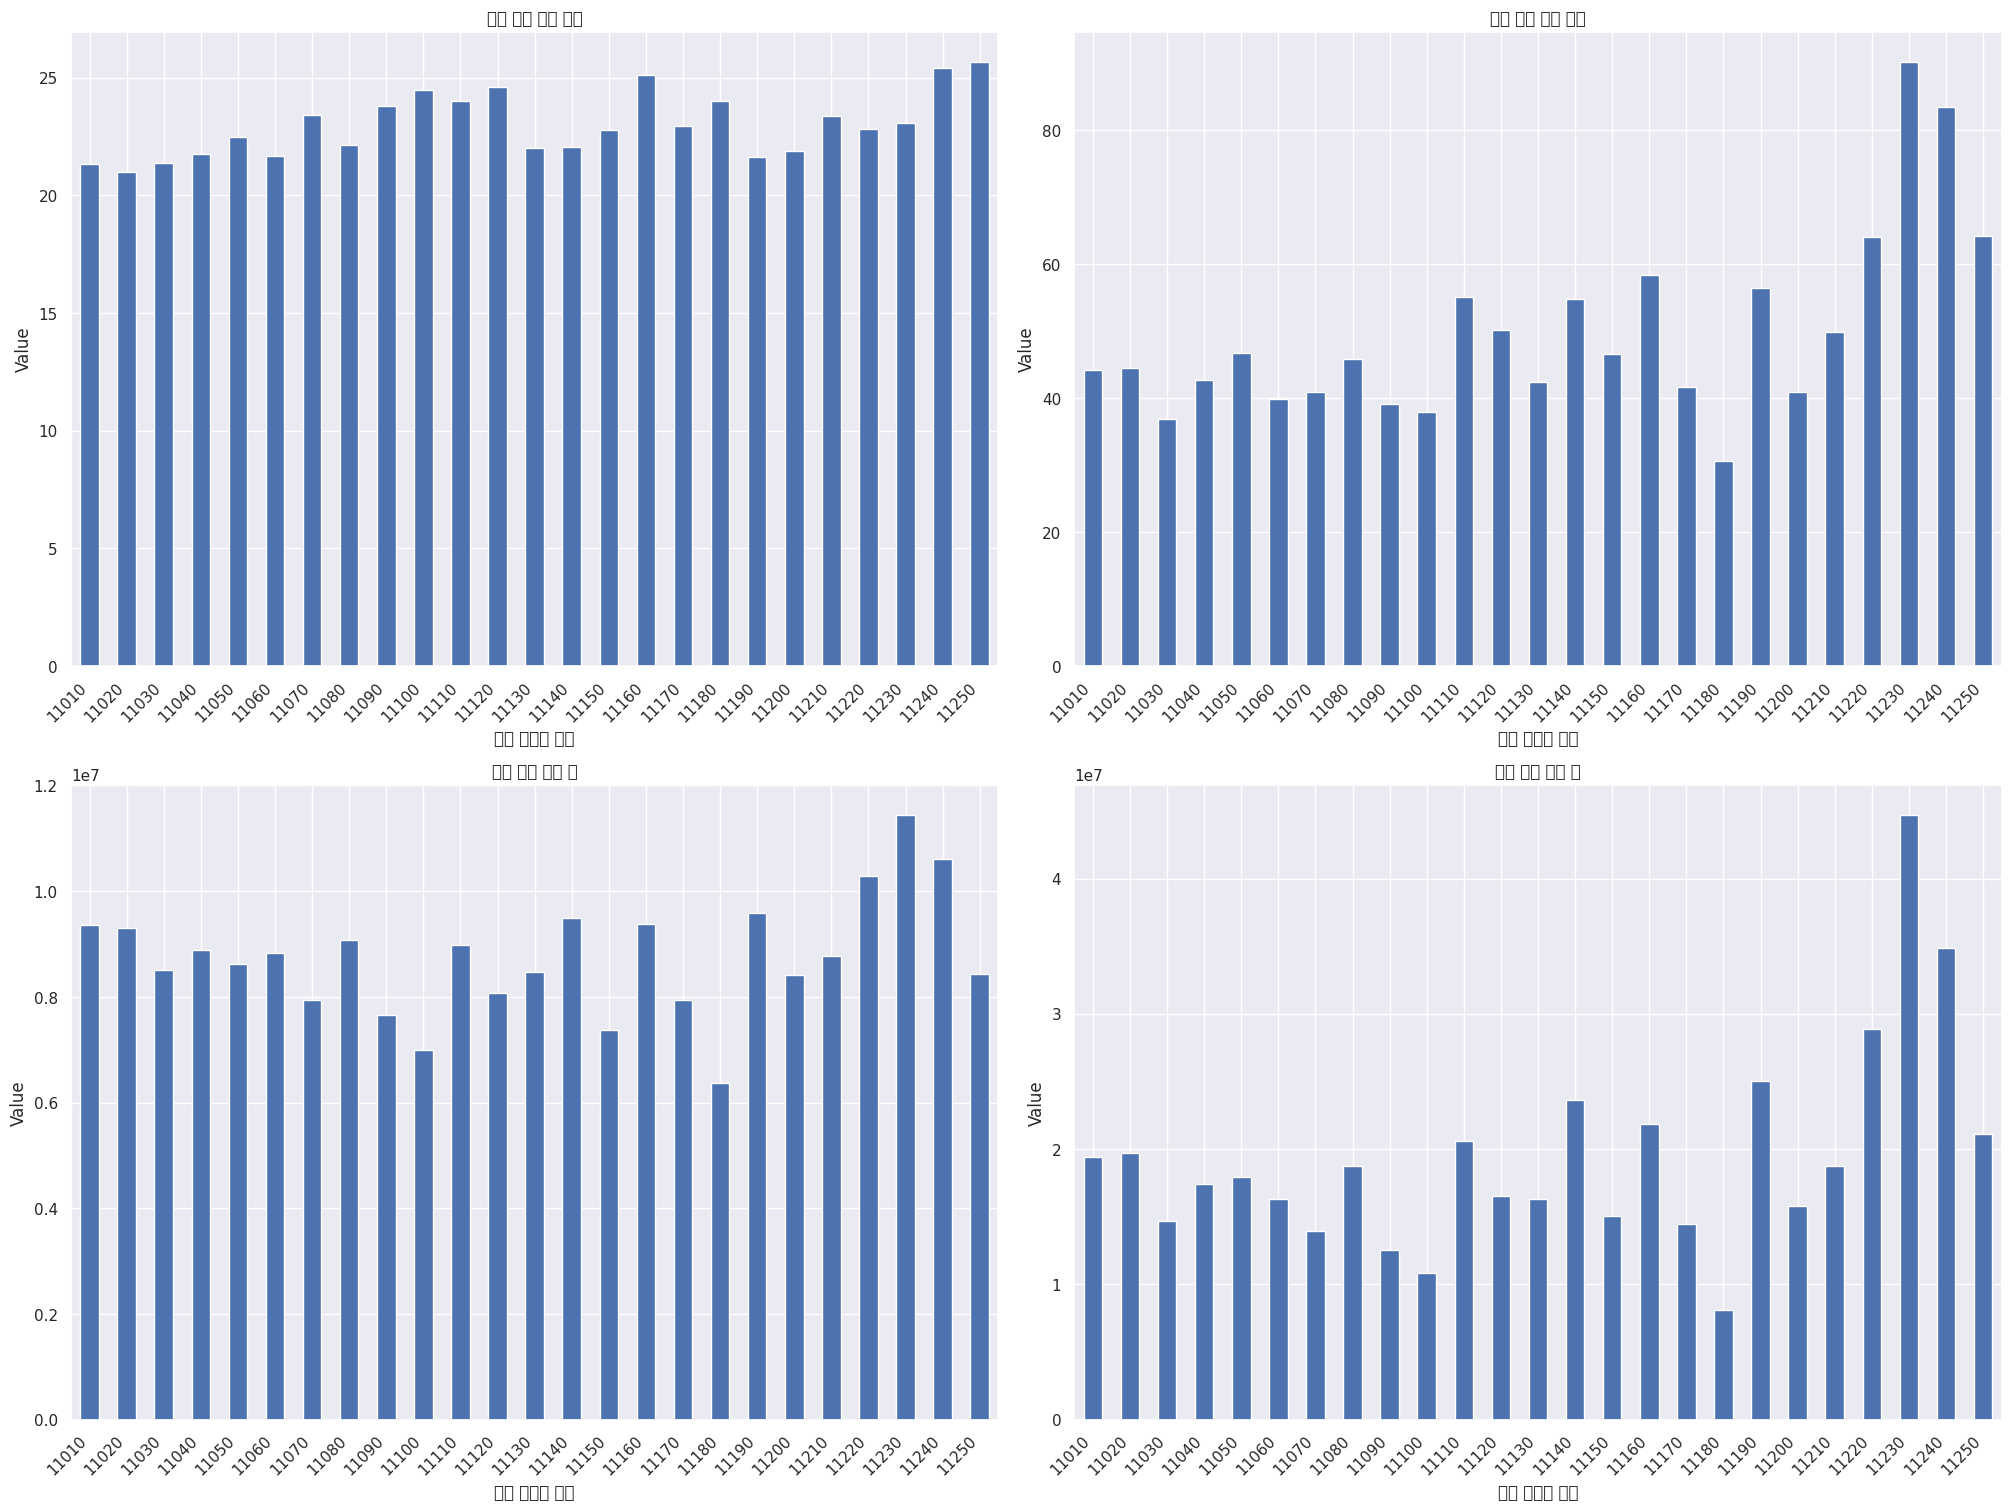

In [ ]:
draw_bar_graphs(df_seoul_moving, index_column='도착 시군구 코드')